# Color tweaking
#### Ref：
* https://scikit-image.org/docs/stable/api/skimage.color.html#skimage.color.lab2rgb
* https://stackoverflow.com/questions/25294141/cielab-color-range-for-scikit-image
* https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c
* https://stackoverflow.com/questions/59349326/pointing-all-arrows-towards-the-origin-in-matplotlib-3d-scatter
* https://stackoverflow.com/questions/8500700/how-to-plot-a-gradient-color-line-in-matplotlib
* https://gist.github.com/WetHat/1d6cd0f7309535311a539b42cccca89c

In [1]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from matplotlib.text import Annotation
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
%matplotlib notebook

In [2]:
class Arrow3D(FancyArrowPatch):

    def __init__(self, x, y, z, dx, dy, dz, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._xyz = (x, y, z)
        self._dxdydz = (dx, dy, dz)

    def draw(self, renderer):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)
        
    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._xyz
        dx, dy, dz = self._dxdydz
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)

        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

        return np.min(zs) 
def _arrow3D(ax, x, y, z, dx, dy, dz, *args, **kwargs):
    '''Add an 3d arrow to an `Axes3D` instance.'''

    arrow = Arrow3D(x, y, z, dx, dy, dz, *args, **kwargs)
    ax.add_artist(arrow)


setattr(Axes3D, 'arrow3D', _arrow3D)

In [3]:
colors = {'red': np.array((255, 0, 0)), 'orange': np.array((255, 69, 0)),
           'yellow': np.array((255, 255, 0)), 'green': np.array((0, 128, 0)),
           'blue': np.array((0, 0, 255)), 'white': np.array((255, 255, 255)), 
           'black': np.array((0, 0, 0)), 'brown': np.array((139, 69, 19)), 
           'gray': np.array((128, 128, 128))}
colors_lab = {key: color.rgb2lab(np.array(np.ones((1, 1, 3)) * value/255)) for (key, value) in colors.items()}
source_rgb = np.array((64,128,128))
source_lab = color.rgb2lab(np.array(source_rgb/255))
source_rgb = color.lab2rgb(np.array(source_lab))
source_rgb *= 255

In [4]:
def hsv_normal(hsv_nparray):
    hsv_nparray = [hsv_nparray[0]*360,hsv_nparray[1]*100,hsv_nparray[2]*100]
    return hsv_nparray

def hsv_unit(hsv_nparray):
    hsv_nparray = [hsv_nparray[0]/360,hsv_nparray[1]/100,hsv_nparray[2]/100]
    return hsv_nparray

def hsv_tweak(hsv_nparray, n):
    hsv_nparray = hsv_normal(hsv_nparray)
    Hsv = [hsv_nparray[0]+n,hsv_nparray[1],hsv_nparray[2]]
    hSv = [hsv_nparray[0],hsv_nparray[1]+n,hsv_nparray[2]]
    hsV = [hsv_nparray[0],hsv_nparray[1],hsv_nparray[2]+n]
    Hsv = hsv_unit(Hsv)
    hSv = hsv_unit(hSv)
    hsV = hsv_unit(hsV)
    return Hsv, hSv, hsV

def rgb_normal(rgb_nparray):
    rgb_nparray = [rgb_nparray[0]*255,rgb_nparray[1]*255,rgb_nparray[2]*255]
    return rgb_nparray

def rgb_unit(rgb_nparray):
    rgb_nparray = [rgb_nparray[0]/255,rgb_nparray[1]/255,rgb_nparray[2]/255]
    return rgb_nparray

def rgb_tweak(rgb_nparray, n):
    Rgb = [rgb_nparray[0]+n,rgb_nparray[1],rgb_nparray[2]]
    rGb = [rgb_nparray[0],rgb_nparray[1]+n,rgb_nparray[2]]
    rgB = [rgb_nparray[0],rgb_nparray[1],rgb_nparray[2]+n]
    Rgb = rgb_unit(Rgb)
    rGb = rgb_unit(rGb)
    rgB = rgb_unit(rgB)
    return Rgb, rGb, rgB

def vector(a,b):
    vec = b-a
    ax.arrow3D(*a,*vec,mutation_scale=10, arrowstyle="-|>", fc='black')
    return vec

<IPython.core.display.Javascript object>


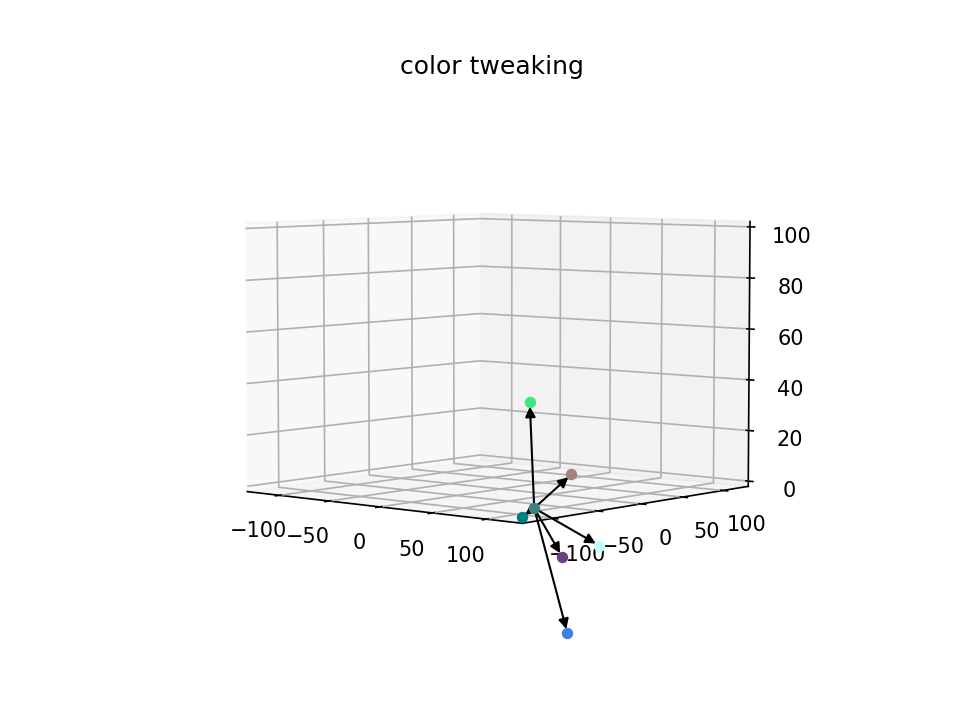

Text(0.5, 0.92, 'color tweaking')

In [5]:
n = 10
fig = plt.figure()
ax = plt.axes(projection='3d')
# generate points
source_rgb = [64, 128, 128]
source_Rgb, source_rGb, source_rgB = rgb_tweak(source_rgb,100)
source_rgb = rgb_unit(source_rgb)

source_lab = color.rgb2lab(np.array(source_rgb))
source_Rgb = color.rgb2lab(np.array(source_Rgb))
source_rGb = color.rgb2lab(np.array(source_rGb)) 
source_rgB = color.rgb2lab(np.array(source_rgB)) 

source_hsv = color.rgb2hsv(np.array(source_rgb))
source_Hsv, source_hSv, source_hsV = hsv_tweak(source_hsv, 100)
source_Hsv = color.hsv2rgb(np.array(source_Hsv))
source_hSv = color.hsv2rgb(np.array(source_hSv))
source_hsV = color.hsv2rgb(np.array(source_hsV))
source_Hsv = color.rgb2lab(np.array(source_Hsv))
source_hSv = color.rgb2lab(np.array(source_hSv))
source_hsV = color.rgb2lab(np.array(source_hsV))

# draw the points 
ax.scatter(*source_lab, color = source_rgb)
ax.scatter(*source_Rgb, color = color.lab2rgb(np.array(source_Rgb)))
ax.scatter(*source_rGb, color = color.lab2rgb(np.array(source_rGb)))
ax.scatter(*source_rgB, color = color.lab2rgb(np.array(source_rgB)))
ax.scatter(*source_Hsv, color = color.lab2rgb(np.array(source_Hsv)))
ax.scatter(*source_hSv, color = color.lab2rgb(np.array(source_hSv)))
ax.scatter(*source_hsV, color = color.lab2rgb(np.array(source_hsV)))

# draw the vector
vector(source_lab,source_Rgb)
vector(source_lab,source_rGb)
vector(source_lab,source_rgB)
vector(source_lab,source_Hsv)
vector(source_lab,source_hSv)
vector(source_lab,source_hsV)
# ax.plot(*source_lab, *source_Rgb)

# set the axis and lim
ax.set_xlim3d(-128, 127)
ax.set_ylim3d(-128, 127)
ax.set_zlim3d(0, 100)
# ax.view_init(20, 35)
ax.set_title('color tweaking')

### colormath Example

In [45]:
# %pip install colormath
from colormath.color_objects import LabColor, sRGBColor, HSVColor
from colormath.color_conversions import convert_color
source = sRGBColor(64, 128, 128)
rgb = convert_color(source, sRGBColor)
hsv = convert_color(source, HSVColor)
lab = convert_color(source, LabColor)
print(rgb,hsv,lab,sep='\n')

sRGBColor (rgb_r:64.0000 rgb_g:128.0000 rgb_b:128.0000)
HSVColor (hsv_h:180.0000 hsv_s:0.5000 hsv_v:128.0000)
LabColor (lab_l:5046.8302 lab_a:-1705.6357 lab_b:-523.6316)


### Gradient Line Experiment

<IPython.core.display.Javascript object>


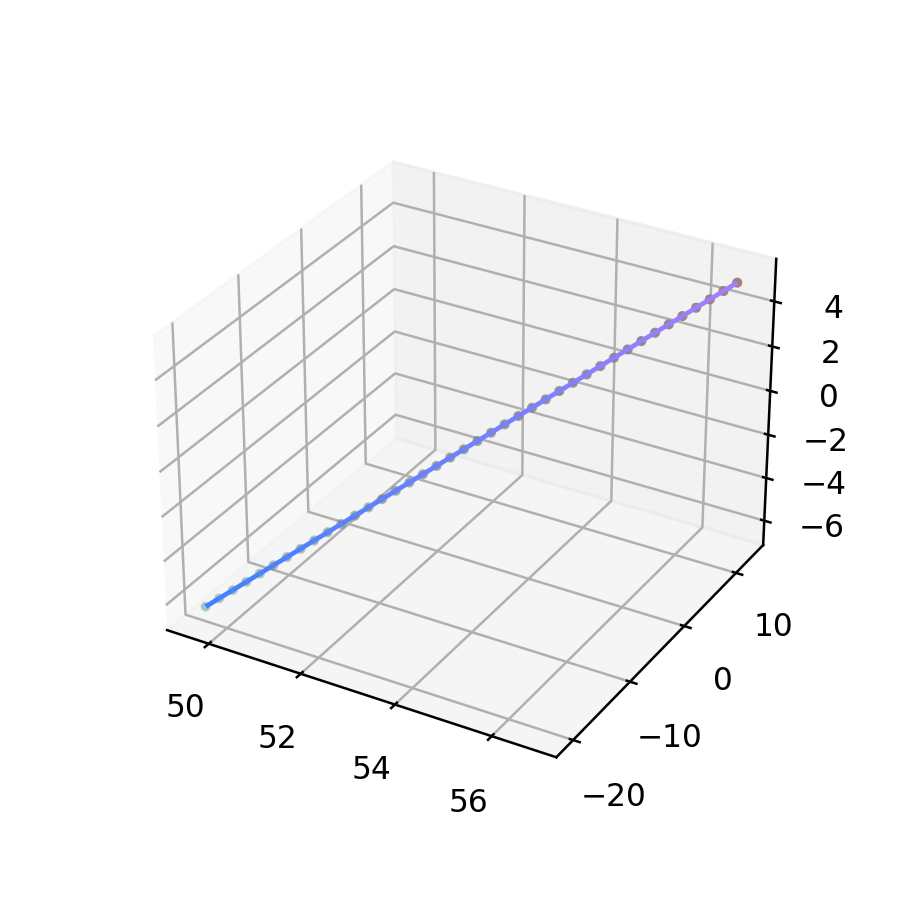

In [46]:
import numpy as np
from matplotlib.collections import LineCollection as lc
from mpl_toolkits.mplot3d.art3d import Line3DCollection as lc3d

from scipy.interpolate import interp1d
from matplotlib.colors import colorConverter

def colored_line_segments(xs,ys,zs=None,color='k',mid_colors=False):
    if isinstance(color,str):
        color = colorConverter.to_rgba(color)[:-1]
        color = np.array([color for i in range(len(xs))])   
    segs = []
    seg_colors = []    
    lastColor = [color[0][0],color[0][1],color[0][2]]        
    start = [xs[0],ys[0]]
    end = [xs[0],ys[0]]        
    if not zs is None:
        start.append(zs[0])
        end.append(zs[0])     
    else:
        zs = [zs]*len(xs)            
    for x,y,z,c in zip(xs,ys,zs,color):
        if mid_colors:
            seg_colors.append([(chan+lastChan)*.5 for chan,lastChan in zip(c,lastColor)])        
        else:   
            seg_colors.append(c)        
        lastColor = c[:-1]           
        if not z is None:
            start = [end[0],end[1],end[2]]
            end = [x,y,z]
        else:
            start = [end[0],end[1]]
            end = [x,y]                 
        segs.append([start,end])               
    colors = [(*color,1) for color in seg_colors]    
    return segs, colors

def test3d():
    def set_view(axi):
#         axi.set_xlim(-.65,.65)
#         axi.set_ylim(-.65,.75)
#         axi.set_zlim(-.65,.65)
#         axi.view_init(elev=45, azim= 45)
        axi.view_init()
    
    NPOINTS = 40
    RESAMPLE = 2
    N_FADE = int(RESAMPLE*NPOINTS*0.5)
    
    N_FADE = 20
    
    N_SEGS = (NPOINTS-1)*(RESAMPLE-1)  

    SHOW_POINTS_AXI_12 = True
    SHOW_POINTS_AXI_34 = False

    alpha = np.linspace(.5,1.5,NPOINTS)*np.pi
    theta = np.linspace(.25,1.5,NPOINTS)*np.pi
    rad = np.linspace(0,1,NPOINTS)        
    xs = rad*np.sin(theta)*np.cos(alpha)
    ys = rad*np.sin(theta)*np.sin(alpha)
    zs = rad*np.cos(theta)
    xs = np.array([((source_lab[0]*i+source_Rgb[0]*(NPOINTS-i))/NPOINTS) for i in range(1,NPOINTS+1)])
    ys = np.array([((source_lab[1]*i+source_Rgb[1]*(NPOINTS-i))/NPOINTS) for i in range(1,NPOINTS+1)])
    zs = np.array([((source_lab[2]*i+source_Rgb[2]*(NPOINTS-i))/NPOINTS) for i in range(1,NPOINTS+1)])
    
    MARKER = '.'
#     CMAP = plt.get_cmap('hsv')
#     COLORS = np.array([CMAP(i)[:-1] for i in np.linspace(0,1,NPOINTS)])
    color_a = color.lab2rgb(np.array(source_lab))
    color_b = color.lab2rgb(np.array(source_Rgb))
    COLORS = np.array([((color_a*i+color_b*(NPOINTS-i))/NPOINTS) for i in range(1,NPOINTS+1)])

#     MARKER_COLOR = COLORS
#     N_SCATTER = (NPOINTS-1)*(RESAMPLE-1)+1
#     COLORS_LONG = np.array([CMAP(i)[:-1] for i in np.linspace(1/N_SCATTER,1,N_SCATTER)])

    fig = plt.figure(figsize=(4,4),dpi=150)
    ax1 = plt.axes(projection='3d')
    segs, colors = colored_line_segments(xs,ys,zs,color=COLORS,mid_colors=True)
    if SHOW_POINTS_AXI_12: ax1.scatter(xs,ys,zs,marker=MARKER,color=COLORS)
    ax1.add_collection(lc3d(segs, colors=colors))
    
    set_view(ax1)
#     fig.savefig('3d_GrandientColorLine.png')
    plt.show()    
    

import matplotlib.pyplot as plt
test3d()